In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Overall we find that we get a sufficiently low KS statistic ($<.05$) for all candidates if we take $n=10$.

$n=10$ and $\theta = .1$

We get a KS value of $\approx .039 < .05$

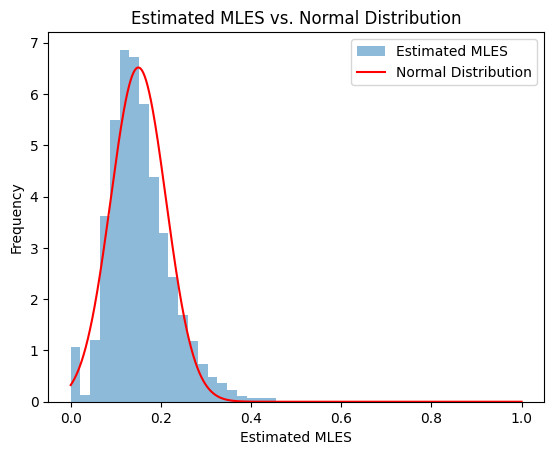

0.039474305591642556


In [46]:
# Initialize sample size and candidates
n = 10
cands = [.1,1,10,25]
theta = cands[0]

# Taking samples from a uniform distribution to use the inverse cdf method
samples = np.random.uniform(low=0.0, high=1.0, size=(10000, n))

# Sampling from our distribution using the inverse cdf as found on Ed
def dist(sampler, thete):
    return 3*thete*((1-sampler)**(-1/3)-1)

samples1 = dist(samples, theta)

# The function that computes \dot\ell of a sample with n elements
def lima(sampl, thete):
    temp = []
    for sem in sampl:
        temp.append(4/(thete + sem/3))
    return (3*n/thete) - sum(temp)

# samplesdot = np.apply_along_axis(func1d=lima, axis=1, arr=samples1)

# The function that computes \ddot\ell
def lima2(samply, thete):
    temp = []
    for sem in samply:
        temp.append(4/((thete + sem/3)**2))
    return sum(temp) - (3*n/(thete**2))

# samplesddot = np.apply_along_axis(func1d=lima2, axis=1, arr=samples1)

# Newton-Raphson for an n-element sample; I find that it converges really well for 10. We take the same value Prof. Tokdar takes as his cutoff.
def newton(samp):
    med = np.median(samp)
    init = 1.2824*med
    for i in range(10):
        if (init <= 0):
            return .000002
        init = init -(lima(samp, init))/(lima2(samp, init))
    return 3*init/2
    
MLES = np.apply_along_axis(func1d=newton, axis = 1, arr=samples1)


# The normal distribution centered at the mean with variance CRLB
norm_mean = 3*theta/2 
norm_var = 15*(theta**2)/(4*n)
x = np.linspace(0, 1, 1000)
normal_distribution = (1 / (np.sqrt(2 * np.pi * norm_var))) * np.exp(
    -((x - norm_mean) ** 2) / (2 * norm_var)
)

# Kolmogorov-Smirnov
def ks(data):
    here = np.sort(data)
    vals = []
    for i in range(len(here)):
        stat = norm.cdf(here[i], loc = norm_mean, scale = np.sqrt(norm_var))
        this = abs(stat-((i+1-.5)/10000)) 
        vals.append(this)
    return max(vals)

plt.hist(MLES, bins=30, density=True, alpha=0.5, label='Estimated MLES')
plt.plot(x, normal_distribution, 'r', label='Normal Distribution')
plt.xlabel('Estimated MLES')
plt.ylabel('Frequency')
plt.legend()
plt.title('Estimated MLES vs. Normal Distribution')
plt.show()
print(ks(MLES))


Now we're taking $\theta=1$ and again $n=10$ works with $KS\approx .04<.05$. Unfortunately my computer has some trouble displaying the normal curve.

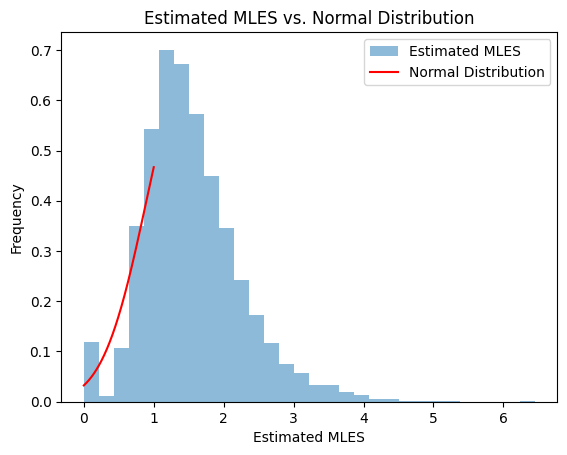

0.04047235402023186


In [47]:
n = 10
theta = cands[1]

# Taking samples from a uniform distribution to use the inverse cdf method
samples = np.random.uniform(low=0.0, high=1.0, size=(10000, n))

# Sampling from our distribution using the inverse cdf as found on Ed
def dist(sampler, thete):
    return 3*thete*((1-sampler)**(-1/3)-1)

samples1 = dist(samples, theta)

# The function that computes \dot\ell of a sample with n elements
def lima(sampl, thete):
    temp = []
    for sem in sampl:
        temp.append(4/(thete + sem/3))
    return (3*n/thete) - sum(temp)

# samplesdot = np.apply_along_axis(func1d=lima, axis=1, arr=samples1)

# The function that computes \ddot\ell
def lima2(samply, thete):
    temp = []
    for sem in samply:
        temp.append(4/((thete + sem/3)**2))
    return sum(temp) - (3*n/(thete**2))

# samplesddot = np.apply_along_axis(func1d=lima2, axis=1, arr=samples1)

# Newton-Raphson for an n-element sample; I find that it converges really well for 10. We take the same value Prof. Tokdar takes as his cutoff.
def newton(samp):
    med = np.median(samp)
    init = 1.2824*med
    for i in range(10):
        if (init <= 0):
            return .000002
        init = init -(lima(samp, init))/(lima2(samp, init))
    return 3*init/2
    
MLES = np.apply_along_axis(func1d=newton, axis = 1, arr=samples1)


# The normal distribution centered at the mean with variance CRLB
norm_mean = 3*theta/2 
norm_var = 15*(theta**2)/(4*n)
x = np.linspace(0, 1, 1000)
normal_distribution = (1 / (np.sqrt(2 * np.pi * norm_var))) * np.exp(
    -((x - norm_mean) ** 2) / (2 * norm_var)
)

# Kolmogorov-Smirnov
def ks(data):
    here = np.sort(data)
    vals = []
    for i in range(len(here)):
        stat = norm.cdf(here[i], loc = norm_mean, scale = np.sqrt(norm_var))
        this = abs(stat-((i+1-.5)/10000)) 
        vals.append(this)
    return max(vals)

plt.hist(MLES, bins=30, density=True, alpha=0.5, label='Estimated MLES')
plt.plot(x, normal_distribution, 'r', label='Normal Distribution')
plt.xlabel('Estimated MLES')
plt.ylabel('Frequency')
plt.legend()
plt.title('Estimated MLES vs. Normal Distribution')
plt.show()
print(ks(MLES))


This one is $\theta=10$. $n=10$ works again with $KS\approx .037<.05$.

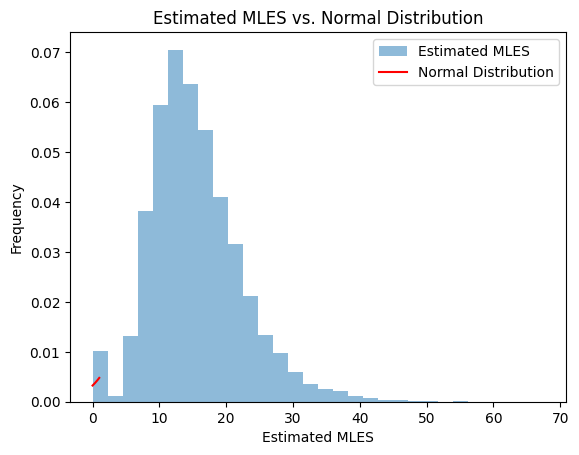

0.0370695018660977


In [48]:
n = 10
theta = cands[2]

# Taking samples from a uniform distribution to use the inverse cdf method
samples = np.random.uniform(low=0.0, high=1.0, size=(10000, n))

# Sampling from our distribution using the inverse cdf as found on Ed
def dist(sampler, thete):
    return 3*thete*((1-sampler)**(-1/3)-1)

samples1 = dist(samples, theta)

# The function that computes \dot\ell of a sample with n elements
def lima(sampl, thete):
    temp = []
    for sem in sampl:
        temp.append(4/(thete + sem/3))
    return (3*n/thete) - sum(temp)

# samplesdot = np.apply_along_axis(func1d=lima, axis=1, arr=samples1)

# The function that computes \ddot\ell
def lima2(samply, thete):
    temp = []
    for sem in samply:
        temp.append(4/((thete + sem/3)**2))
    return sum(temp) - (3*n/(thete**2))

# samplesddot = np.apply_along_axis(func1d=lima2, axis=1, arr=samples1)

# Newton-Raphson for an n-element sample; I find that it converges really well for 10. We take the same value Prof. Tokdar takes as his cutoff.
def newton(samp):
    med = np.median(samp)
    init = 1.2824*med
    for i in range(10):
        if (init <= 0):
            return .000002
        init = init -(lima(samp, init))/(lima2(samp, init))
    return 3*init/2
    
MLES = np.apply_along_axis(func1d=newton, axis = 1, arr=samples1)


# The normal distribution centered at the mean with variance CRLB
norm_mean = 3*theta/2 
norm_var = 15*(theta**2)/(4*n)
x = np.linspace(0, 1, 1000)
normal_distribution = (1 / (np.sqrt(2 * np.pi * norm_var))) * np.exp(
    -((x - norm_mean) ** 2) / (2 * norm_var)
)

# Kolmogorov-Smirnov
def ks(data):
    here = np.sort(data)
    vals = []
    for i in range(len(here)):
        stat = norm.cdf(here[i], loc = norm_mean, scale = np.sqrt(norm_var))
        this = abs(stat-((i+1-.5)/10000)) 
        vals.append(this)
    return max(vals)

plt.hist(MLES, bins=30, density=True, alpha=0.5, label='Estimated MLES')
plt.plot(x, normal_distribution, 'r', label='Normal Distribution')
plt.xlabel('Estimated MLES')
plt.ylabel('Frequency')
plt.legend()
plt.title('Estimated MLES vs. Normal Distribution')
plt.show()
print(ks(MLES))


This is $\theta=25$ for which $n=10$ again works and we have $KS\approx .038<.05$

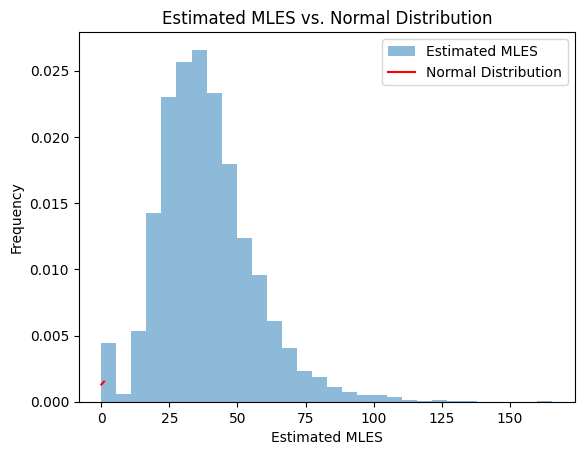

0.037818956245753266


In [49]:
n = 10
theta = cands[3]

# Taking samples from a uniform distribution to use the inverse cdf method
samples = np.random.uniform(low=0.0, high=1.0, size=(10000, n))

# Sampling from our distribution using the inverse cdf as found on Ed
def dist(sampler, thete):
    return 3*thete*((1-sampler)**(-1/3)-1)

samples1 = dist(samples, theta)

# The function that computes \dot\ell of a sample with n elements
def lima(sampl, thete):
    temp = []
    for sem in sampl:
        temp.append(4/(thete + sem/3))
    return (3*n/thete) - sum(temp)

# samplesdot = np.apply_along_axis(func1d=lima, axis=1, arr=samples1)

# The function that computes \ddot\ell
def lima2(samply, thete):
    temp = []
    for sem in samply:
        temp.append(4/((thete + sem/3)**2))
    return sum(temp) - (3*n/(thete**2))

# samplesddot = np.apply_along_axis(func1d=lima2, axis=1, arr=samples1)

# Newton-Raphson for an n-element sample; I find that it converges really well for 10. We take the same value Prof. Tokdar takes as his cutoff.
def newton(samp):
    med = np.median(samp)
    init = 1.2824*med
    for i in range(10):
        if (init <= 0):
            return .000002
        init = init -(lima(samp, init))/(lima2(samp, init))
    return 3*init/2
    
MLES = np.apply_along_axis(func1d=newton, axis = 1, arr=samples1)


# The normal distribution centered at the mean with variance CRLB
norm_mean = 3*theta/2 
norm_var = 15*(theta**2)/(4*n)
x = np.linspace(0, 1, 1000)
normal_distribution = (1 / (np.sqrt(2 * np.pi * norm_var))) * np.exp(
    -((x - norm_mean) ** 2) / (2 * norm_var)
)

# Kolmogorov-Smirnov
def ks(data):
    here = np.sort(data)
    vals = []
    for i in range(len(here)):
        stat = norm.cdf(here[i], loc = norm_mean, scale = np.sqrt(norm_var))
        this = abs(stat-((i+1-.5)/10000)) 
        vals.append(this)
    return max(vals)

plt.hist(MLES, bins=30, density=True, alpha=0.5, label='Estimated MLES')
plt.plot(x, normal_distribution, 'r', label='Normal Distribution')
plt.xlabel('Estimated MLES')
plt.ylabel('Frequency')
plt.legend()
plt.title('Estimated MLES vs. Normal Distribution')
plt.show()
print(ks(MLES))
